In [2]:
# load packages
import sys
sys.path.append('/pf/b/b380723/anaconda3/lib/python3.6/site-packages')
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from lagranto import Tra
from lagranto.plotting import plot_trajs
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import numpy as np

In [3]:
#loading datasets

path = '/work/bb1018/b380723'
moments=(['1m','2m'])
resolutions=['0.8','0.4','0.2','0.1convon','0.05convon','0.025convon','0.1convoff','0.05convoff','0.025convoff']

#all trajectories
alltrajectory=[]
for moment in moments[1:]:
    for resolution in resolutions:
        alltrajectory.append(xr.open_dataset(path+'/'+resolution+'/'+moment+'/'+'outtrace1.nc'))

#subclasses
subclass1=[]
subclass2=[]
subclass3=[]
subclass4=[]
for moment in moments[:-1]:
        for i in range(0,9):
            subclass1.append(xr.open_dataset(path+'/'+resolutions[i]+'/'+moment+'/'+'outtrace1box1.nc'))
            subclass2.append(xr.open_dataset(path+'/'+resolutions[i]+'/'+moment+'/'+'outtrace1box2.nc'))
            subclass3.append(xr.open_dataset(path+'/'+resolutions[i]+'/'+moment+'/'+'outtrace1box3.nc'))
            subclass4.append(xr.open_dataset(path+'/'+resolutions[i]+'/'+moment+'/'+'outtrace1box4.nc'))

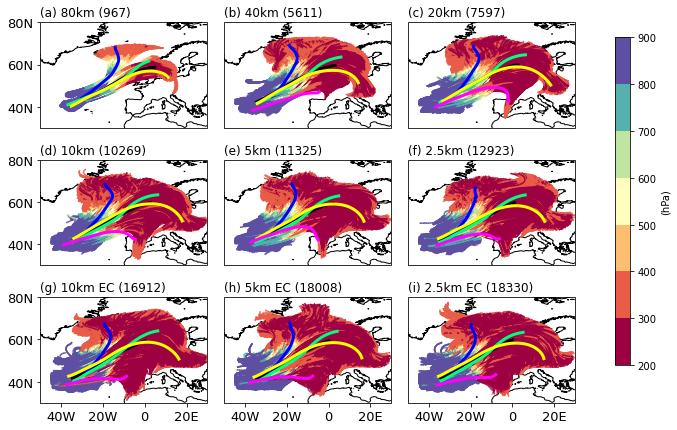

In [5]:
## plot equivalent potential temperature and isentropic potential vorticity at 24h interval

#setting map
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(3, 3, figsize=(11,7), subplot_kw=dict(projection=proj))
ax = ax.reshape(-1)
for i in range(ax.shape[0]):
    ax[i].coastlines(rasterized=True)
    ax[i].set_aspect('auto')
    ax[i].tick_params(labelsize=13)
    ax[i].set_extent([-50, 30, 30, 80], ccrs.PlateCarree())
    
    # set xticks and yticks for latitudes and longitudes
    # xaxis: longitudes
    if i in [6,7,8]:
        ax[i].set_xticks([-40,-20,0,20], crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(#zero_direction_label=True,
                                           degree_symbol='',
                                           dateline_direction_label=True)
        ax[i].xaxis.set_major_formatter(lon_formatter)
        del lon_formatter
    # yaxis: latitudes
    if i in [0, 3, 6]:
        ax[i].set_yticks([40,60,80], crs=ccrs.PlateCarree())
        lat_formatter = LatitudeFormatter(degree_symbol='')
        ax[i].yaxis.set_major_formatter(lat_formatter)
        del lat_formatter

#plotting
trajs=[]
for i in range(0,9):
    trajs.append('trajs'+str(i))

for moment in moments[:-1]:
    for i in range(0,9):
            trajs[i]=Tra()
            trajs[i].load_netcdf(path+'/'+resolutions[i]+'/'+moment+'/'+'outtrace1.nc')
            lc=plot_trajs(ax[i], trajs[i], 'P', levels=np.arange(200, 1000, 100), rasterized=False)
            
#plotting mean value over all trajectories and subclasses
for i in range(0,9):
    ax[i].plot(alltrajectory[i]['lon'].mean(axis=1),alltrajectory[i]['lat'].mean(axis=1),linewidth=3,color='black')
    ax[i].plot(subclass1[i]['lon'].mean(axis=1),subclass1[i]['lat'].mean(axis=1),linewidth=3,color='blue')
    ax[i].plot(subclass2[i]['lon'].mean(axis=1),subclass2[i]['lat'].mean(axis=1),linewidth=3,color='springgreen')
    ax[i].plot(subclass3[i]['lon'].mean(axis=1),subclass3[i]['lat'].mean(axis=1),linewidth=3,color='yellow')
#separate loop because 80km does not have subclass-4
for i in range(1,9):
    ax[i].plot(subclass4[i]['lon'].mean(axis=1),subclass4[i]['lat'].mean(axis=1),linewidth=3,color='fuchsia')

#title
for i in range(0,9):
    title = ['(a) 80km ','(b) 40km ','(c) 20km ','(d) 10km ','(e) 5km ','(f) 2.5km ','(g) 10km EC ','(h) 5km EC ', '(i) 2.5km EC ']
    ax[i].set_title(title[i] + '('+str(len(alltrajectory[i].ntra))+')', loc='left')

#colorbar
cbar_ax = fig.add_axes([0.85, 0.2, 0.02, 0.65])
clb=fig.colorbar(lc, cax=cbar_ax, orientation='vertical',fraction=0.046, pad=0.04, ticks= [200,300,400,500,600,700,800,900,1000])
clb.set_label('(hPa)')
fig.subplots_adjust(right=0.8, wspace=0.1, hspace=0.3)

plt.show(fig)
plt.close(fig)